# **Penting**
- Jangan mengubah atau menambahkan cell text yang sudah disediakan, Anda hanya perlu mengerjakan cell code yang sudah disediakan.
- Pastikan seluruh kriteria memiliki output yang sesuai, karena jika tidak ada output dianggap tidak selesai.
- Misal, Anda menggunakan df = df.dropna() silakan gunakan df.isnull().sum() sebagai tanda sudah berhasil. Silakan sesuaikan seluruh output dengan perintah yang sudah disediakan.
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Pastikan Anda menggunakan variabel df dari awal sampai akhir dan tidak diperbolehkan mengganti nama variabel tersebut.
- Hapus simbol pagar (#) pada kode yang bertipe komentar jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan
- Pastikan Anda mengerjakan sesuai section yang sudah diberikan tanpa mengubah judul atau header yang disediakan.

# **INFORMASI DATASET**

Dataset ini menyajikan gambaran mendalam mengenai perilaku transaksi dan pola aktivitas keuangan, sehingga sangat ideal untuk eksplorasi **deteksi penipuan (fraud detection)** dan **identifikasi anomali**. Dataset ini mencakup **2.512 sampel data transaksi**, yang mencakup berbagai atribut transaksi, demografi nasabah, dan pola penggunaan.

Setiap entri memberikan wawasan komprehensif terhadap perilaku transaksi, memungkinkan analisis untuk **keamanan finansial** dan pengembangan model prediktif.

## Fitur Utama

- **`TransactionID`**: Pengidentifikasi unik alfanumerik untuk setiap transaksi.  
- **`AccountID`**: ID unik untuk setiap akun, dapat memiliki banyak transaksi.  
- **`TransactionAmount`**: Nilai transaksi dalam mata uang, mulai dari pengeluaran kecil hingga pembelian besar.  
- **`TransactionDate`**: Tanggal dan waktu transaksi terjadi.  
- **`TransactionType`**: Tipe transaksi berupa `'Credit'` atau `'Debit'`.  
- **`Location`**: Lokasi geografis transaksi (nama kota di Amerika Serikat).  
- **`DeviceID`**: ID perangkat yang digunakan dalam transaksi.  
- **`IP Address`**: Alamat IPv4 yang digunakan saat transaksi, dapat berubah untuk beberapa akun.  
- **`MerchantID`**: ID unik merchant, menunjukkan merchant utama dan anomali transaksi.  
- **`AccountBalance`**: Saldo akun setelah transaksi berlangsung.  
- **`PreviousTransactionDate`**: Tanggal transaksi terakhir pada akun, berguna untuk menghitung frekuensi transaksi.  
- **`Channel`**: Kanal transaksi seperti `Online`, `ATM`, atau `Branch`.  
- **`CustomerAge`**: Usia pemilik akun.  
- **`CustomerOccupation`**: Profesi pengguna seperti `Dokter`, `Insinyur`, `Mahasiswa`, atau `Pensiunan`.  
- **`TransactionDuration`**: Lama waktu transaksi (dalam detik).  
- **`LoginAttempts`**: Jumlah upaya login sebelum transaksi—jumlah tinggi bisa mengindikasikan anomali.

Tugas kamu adalah membuat model clustering yang selanjutnya akan digunakan untuk membuat model klasifikasi.


# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning. Semua library yang dibutuhkan harus **import** di **cell** ini, jika ada library yang dijalankan di cell lain maka **submission langsung ditolak**

In [1]:
# Import pustaka yang diperlukan
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from google.colab import drive
import warnings

# Mengabaikan peringatan untuk kebersihan output
warnings.filterwarnings('ignore')

print("Pustaka berhasil diimpor.")

Pustaka berhasil diimpor.


# **2. Memuat Dataset**
Pada tahap ini, Anda perlu memuat dataset ke dalam notebook lalu mengecek informasi dataset sebelum nantinya dilakukan pembersihan. Hal-hal yang perlu dilakukan pada tahapan ini yaitu:
1. **Memahami Struktur Data**
   - Dataset harus mengambil referensi wajib digunakan (bisa dilihat [Disini](https://drive.google.com/drive/folders/1Zs7VmPZ-jNwsRlMKH65Ea-LApSwx6lKx?usp=drive_link))
   - Melakukan loading dataset ke dalam notebook dan menampilkan 5 baris pertama dengan function `head`.
   - Tinjau jumlah baris kolom dan jenis data dalam dataset dengan function `info`.  
   - Menampilkan statistik deskriptif dataset dengan menjalankan `describe`.
   - Pastikan **setiap function tersebut** memiliki **output pada setiap cell** code. Jika tidak **submission langsung ditolak**
   

Gunakan code ini untuk melakukan load data secara otomatis tanpa harus download data tersebut secara manual:
```python
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)
```

Penting: pada kriteria pertama hindari penggunaan print() dan display() karena seluruh fungsi yang digunakan sudah memiliki standar output dan menghasilkan output yang diharapkan.

Kriteria 1 akan ditolak ketika:
- print(__.head())
- display(___.head())
dst

Kriteria 1 akan diterima ketika Anda menggunakan fungsi yang diminta tanpa menambahkan deskripsi apapun.

In [2]:
#Load Data
drive.mount('/content/drive')

url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)

print("Dataset berhasil dimuat.")

Mounted at /content/drive
Dataset berhasil dimuat.


In [3]:
# Tampilkan 5 baris pertama dengan function head.
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,198.0,1.0,7429.40,2024-11-04 08:06:39


In [4]:
# Tinjau jumlah baris kolom dan jenis data dalam dataset dengan info.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   TransactionDate          2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null   float64
 14  AccountBalance          

In [5]:
# Menampilkan statistik deskriptif dataset dengan menjalankan describe
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2511.000000,2519.000000,2511.000000,2516.000000,2510.000000
mean,297.656468,44.678444,119.422939,1.121622,5113.438124
std,292.230367,17.837359,70.078513,0.594469,3897.975861
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.310000,27.000000,63.000000,1.000000,1504.727500
50%,211.360000,45.000000,112.000000,1.000000,4734.110000
75%,413.105000,59.000000,161.000000,1.000000,7672.687500
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

**Apabila ingin menerapkan Advanced, pastikan seluruh visualisasi tidak ada yang overlap**

Matriks Korelasi:
                     TransactionAmount  CustomerAge  TransactionDuration  \
TransactionAmount             1.000000    -0.024428             0.004782   
CustomerAge                  -0.024428     1.000000            -0.009852   
TransactionDuration           0.004782    -0.009852             1.000000   
LoginAttempts                -0.007397     0.007876             0.030076   
AccountBalance               -0.026310     0.321161             0.006859   

                     LoginAttempts  AccountBalance  
TransactionAmount        -0.007397       -0.026310  
CustomerAge               0.007876        0.321161  
TransactionDuration       0.030076        0.006859  
LoginAttempts             1.000000        0.009088  
AccountBalance            0.009088        1.000000  


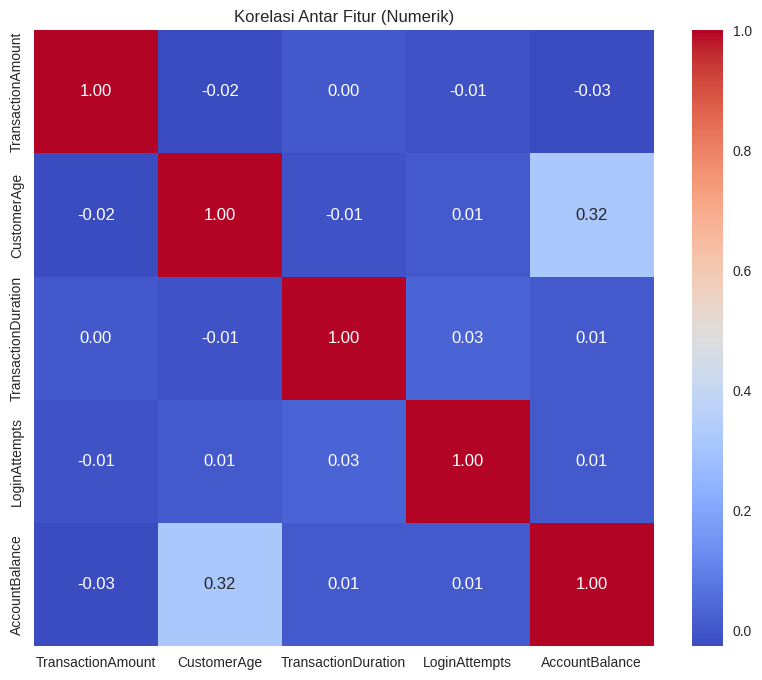

In [6]:
# Menampilkan korelasi antar fitur (Opsional Skilled 1)
# Ambil hanya kolom numerik
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Hitung matriks korelasi
corr_matrix = numeric_df.corr()

# Tampilkan matriks korelasi
print("Matriks Korelasi:")
print(corr_matrix)

# Visualisasi dengan heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Korelasi Antar Fitur (Numerik)")
plt.show()

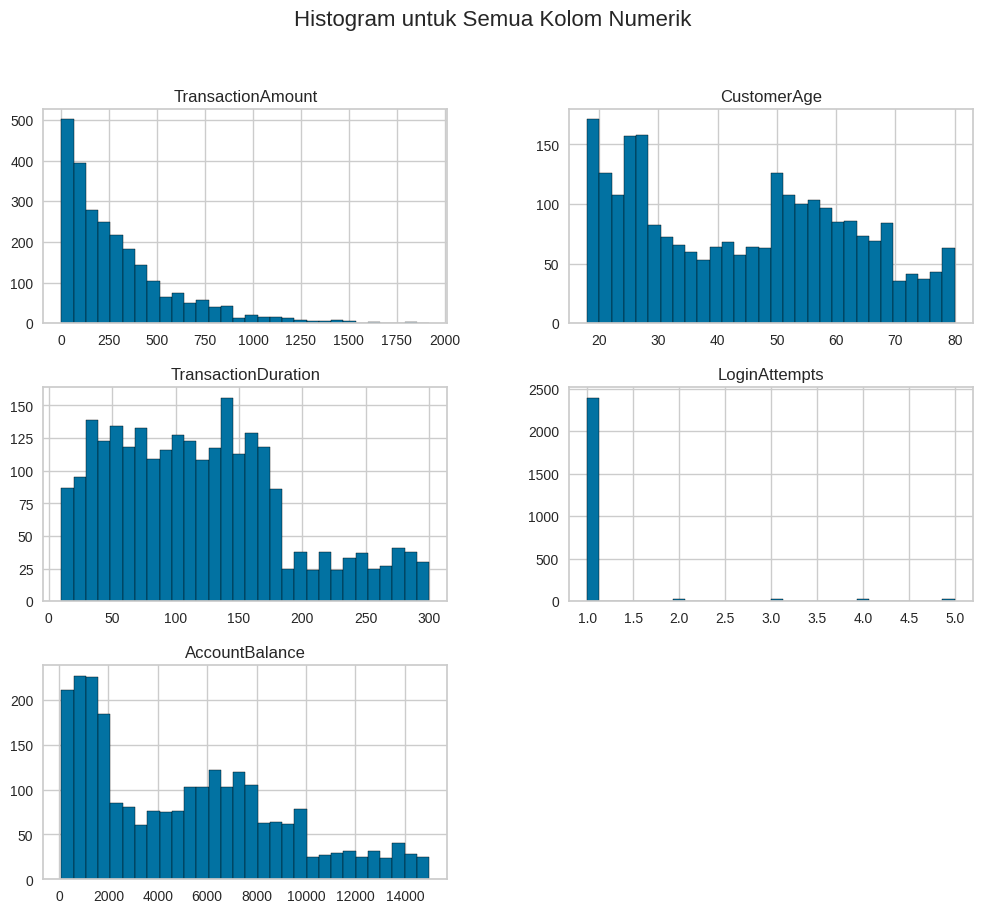

In [7]:
# Menampilkan histogram untuk semua kolom numerik (Opsional Skilled 1)
numeric_df.hist(figsize=(12, 10), bins=30, edgecolor='black')

plt.suptitle("Histogram untuk Semua Kolom Numerik", fontsize=16)
plt.show()

(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [8]:
# Visualisasi yang lebih informatif (Opsional Advanced 1)

# **3. Pembersihan dan Pra Pemrosesan Data**

Pada tahap ini, Anda akan melakukan **Pembersihan Dataset** untuk menjadikan dataset mudah diintepretasi dan bisa dilatih. Hal-hal yang wajib kamu lakukan yaitu:

1. **Mengecek dataset** menggunakan isnull().sum() dan duplicated().sum().
2. Melakukan feature scaling menggunakan `MinMaxScaler()` atau `StandardScalar()` untuk fitur numerik.
3. Melakukan feature encoding menggunakan `LabelEncoder()` untuk fitur kategorikal.
4. Melakukan drop pada kolom id.
5. **Ketentuan Cell Code**
   - Pastikan **setiap pemeriksaan tersebut** memiliki **output pada cell-nya**. Jika tidak **submission langsung ditolak**


In [9]:
# Mengecek dataset menggunakan isnull().sum()
print("Jumlah nilai null per kolom:")
print(df.isnull().sum())

Jumlah nilai null per kolom:
TransactionID              29
AccountID                  21
TransactionAmount          26
TransactionDate            28
TransactionType            30
Location                   30
DeviceID                   30
IP Address                 20
MerchantID                 23
Channel                    27
CustomerAge                18
CustomerOccupation         23
TransactionDuration        26
LoginAttempts              21
AccountBalance             27
PreviousTransactionDate    24
dtype: int64


In [10]:
# Mengecek dataset menggunakan duplicated().sum()
print(f"\nJumlah baris duplikat: {df.duplicated().sum()}")


Jumlah baris duplikat: 21


In [11]:
# Melakukan feature scaling menggunakan MinMaxScaler() atau StandardScalar() untuk fitur numerik.
numerical_cols = df.select_dtypes(include=np.number).columns
scaler = MinMaxScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Pastikan kamu menggunakan function head setelah melalukan scaling.
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,0.007207,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,0.838710,Doctor,0.244828,0.0,0.336832,2024-11-04 08:08:08
1,TX000002,AC00455,0.195940,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,0.806452,Doctor,0.451724,0.0,0.918055,2024-11-04 08:09:35
2,TX000003,AC00019,0.065680,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,0.016129,Student,0.158621,0.0,0.068637,2024-11-04 08:07:04
3,TX000004,AC00070,0.096016,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,0.129032,Student,0.051724,0.0,0.569198,2024-11-04 08:09:06
4,TX000005,AC00411,0.006874,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,0.648276,0.0,0.492591,2024-11-04 08:06:39


In [12]:
# Melakukan drop pada kolom yang memiliki keterangan id dan IP Address
columns_to_drop = ['TransactionID', 'AccountID', 'DeviceID', 'IP Address', 'MerchantID']
df.drop(columns=[col for col in columns_to_drop if col in df.columns], inplace=True)
df.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,0.007207,2023-04-11 16:29:14,Debit,San Diego,ATM,0.838710,Doctor,0.244828,0.0,0.336832,2024-11-04 08:08:08
1,0.195940,2023-06-27 16:44:19,Debit,Houston,ATM,0.806452,Doctor,0.451724,0.0,0.918055,2024-11-04 08:09:35
2,0.065680,2023-07-10 18:16:08,Debit,Mesa,Online,0.016129,Student,0.158621,0.0,0.068637,2024-11-04 08:07:04
3,0.096016,2023-05-05 16:32:11,Debit,Raleigh,Online,0.129032,Student,0.051724,0.0,0.569198,2024-11-04 08:09:06
4,0.006874,2023-10-16 17:51:24,Credit,Atlanta,Online,NaN,Student,0.648276,0.0,0.492591,2024-11-04 08:06:39


In [13]:
# Melakukan feature encoding menggunakan LabelEncoder() untuk fitur kategorikal.
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# Pastikan kamu menggunakan function head setelah melalukan encoding.
df.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,0.007207,680,1,36,0,0.838710,0,0.244828,0.0,0.336832,105
1,0.195940,1178,1,15,0,0.806452,0,0.451724,0.0,0.918055,192
2,0.065680,1262,1,23,2,0.016129,3,0.158621,0.0,0.068637,41
3,0.096016,818,1,33,2,0.129032,3,0.051724,0.0,0.569198,163
4,0.006874,1939,0,1,2,NaN,3,0.648276,0.0,0.492591,16


In [14]:
# Last checking gunakan columns.tolist() untuk checking seluruh fitur yang ada.
# Perbaiki kode di bawah ini tanpa menambahkan atau mengurangi cell code ini.
df.columns.tolist()

['TransactionAmount',
 'TransactionDate',
 'TransactionType',
 'Location',
 'Channel',
 'CustomerAge',
 'CustomerOccupation',
 'TransactionDuration',
 'LoginAttempts',
 'AccountBalance',
 'PreviousTransactionDate']

(Opsional) Pembersihan dan Pra Pemrosesan Data [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [15]:
# Menangani data yang hilang (bisa menggunakan dropna() atau metode imputasi fillna()).
df = df.dropna()
print("\nInfo dataset setelah dropna():")
df.info()


Info dataset setelah dropna():
<class 'pandas.core.frame.DataFrame'>
Index: 2420 entries, 0 to 2536
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionAmount        2420 non-null   float64
 1   TransactionDate          2420 non-null   int64  
 2   TransactionType          2420 non-null   int64  
 3   Location                 2420 non-null   int64  
 4   Channel                  2420 non-null   int64  
 5   CustomerAge              2420 non-null   float64
 6   CustomerOccupation       2420 non-null   int64  
 7   TransactionDuration      2420 non-null   float64
 8   LoginAttempts            2420 non-null   float64
 9   AccountBalance           2420 non-null   float64
 10  PreviousTransactionDate  2420 non-null   int64  
dtypes: float64(5), int64(6)
memory usage: 226.9 KB


In [16]:
# Menghapus data duplikat menggunakan drop_duplicates().
df = df.drop_duplicates()
print("\nInfo dataset setelah drop duplicate():")
df.info()


Info dataset setelah drop duplicate():
<class 'pandas.core.frame.DataFrame'>
Index: 2398 entries, 0 to 2535
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionAmount        2398 non-null   float64
 1   TransactionDate          2398 non-null   int64  
 2   TransactionType          2398 non-null   int64  
 3   Location                 2398 non-null   int64  
 4   Channel                  2398 non-null   int64  
 5   CustomerAge              2398 non-null   float64
 6   CustomerOccupation       2398 non-null   int64  
 7   TransactionDuration      2398 non-null   float64
 8   LoginAttempts            2398 non-null   float64
 9   AccountBalance           2398 non-null   float64
 10  PreviousTransactionDate  2398 non-null   int64  
dtypes: float64(5), int64(6)
memory usage: 224.8 KB


(Opsional) Pembersihan dan Pra Pemrosesan Data [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [17]:
# Melakukan Handling Outlier Data berdasarkan jumlah outlier, apakah menggunakan metode drop atau mengisi nilai tersebut.

In [18]:
# Melakukan binning data berdasarkan kondisi rentang nilai pada fitur numerik,
# lakukan pada satu sampai dua fitur numerik.
# Silahkan lakukan encode hasil binning tersebut menggunakan LabelEncoder.
# Pastikan kamu mengerjakan tahapan ini pada satu cell.

# **4. Membangun Model Clustering**
Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan.
1. Pastikan Anda menggunakan dataframe yang sudah melalui processing sesuai dengan levelnya (Basic, Skilled, Advanced)
2. Melakukan visualisasi Elbow Method untuk menentukan jumlah cluster terbaik menggunakan `KElbowVisualizer()`.
3. Menggunakan algoritma K-Means Clustering dengan `sklearn.cluster.KMeans()`.
4. Jalankan cell code `joblib.dump(model_kmeans, "model_clustering.h5")` untuk menyimpan model yang sudah dibuat.

In [19]:
# Gunakan describe untuk memastikan proses clustering menggunakan dataset hasil preprocessing
# Lengkapi kode ini dengan mengubah nama DataFrame yang akan dilatih.
# Kode harus digunakan dan dilarang menambahkan syntax lainnya pada cell ini.
df.describe()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
count,2398.000000,2398.000000,2398.000000,2398.000000,2398.000000,2398.000000,2398.000000,2398.000000,2398.000000,2398.000000,2398.000000
mean,0.154922,1256.404921,0.788574,21.383653,1.013344,0.429323,1.532110,0.377521,0.030025,0.335330,180.984987
std,0.151893,726.716182,0.437979,12.417622,0.831075,0.287681,1.153802,0.242365,0.147059,0.262236,103.757245
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.042624,626.250000,1.000000,11.000000,0.000000,0.145161,0.000000,0.182759,0.000000,0.093288,92.000000
50%,0.110829,1254.500000,1.000000,21.000000,1.000000,0.435484,2.000000,0.351724,0.000000,0.308010,181.000000
75%,0.214235,1884.750000,1.000000,32.000000,2.000000,0.661290,3.000000,0.524138,0.000000,0.507822,271.750000
max,1.000000,2485.000000,2.000000,43.000000,3.000000,1.000000,4.000000,1.000000,1.000000,1.000000,360.000000


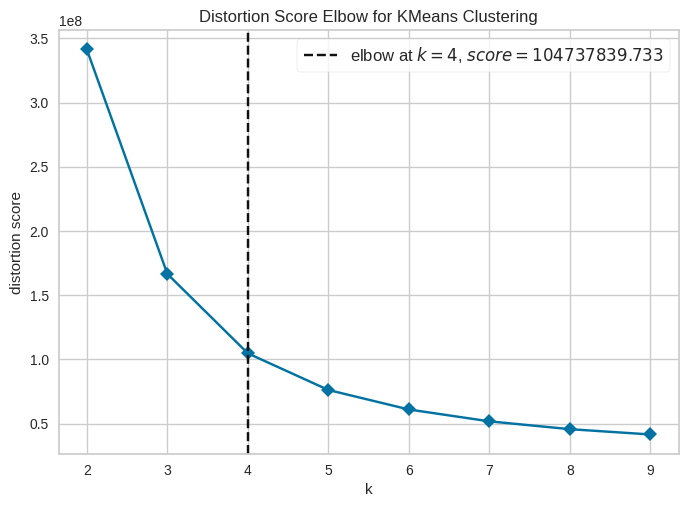

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [20]:
# Melakukan visualisasi Elbow Method menggunakan KElbowVisualizer()
model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(2, 10), timings=False)
visualizer.fit(df)
visualizer.show()

In [21]:
# Menggunakan algoritma K-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
kmeans.fit(df)
cluster_labels = kmeans.predict(df)
centers = kmeans.cluster_centers_
df['cluster_labels'] = kmeans.labels_


print("K-Means berhasil dijalankan!")
print("\nLabel cluster untuk beberapa data pertama:")
print(cluster_labels[:10])  # menampilkan 10 data pertama

print("\nCentroid cluster:")
print(centers)

K-Means berhasil dijalankan!

Label cluster untuk beberapa data pertama:
[0 0 0 0 0 2 0 2 2 2]

Centroid cluster:
[[1.49079954e-01 9.52216887e+02 7.89735099e-01 2.14387417e+01
  1.01986755e+00 4.35644093e-01 1.56788079e+00 3.75028545e-01
  2.73178808e-02 3.29858291e-01 1.73251656e+02]
 [1.51289256e-01 2.20623898e+03 7.72881356e-01 2.12881356e+01
  1.06610169e+00 4.32340077e-01 1.51186441e+00 3.80859147e-01
  3.26271186e-02 3.43853366e-01 1.80364407e+02]
 [1.53174386e-01 3.18625616e+02 8.09523810e-01 2.14220033e+01
  9.72085386e-01 4.12415912e-01 1.47290640e+00 3.66576072e-01
  3.65353038e-02 3.36582782e-01 1.88247947e+02]
 [1.66243656e-01 1.58318655e+03 7.81512605e-01 2.13831933e+01
  9.96638655e-01 4.37218758e-01 1.57647059e+00 3.87945523e-01
  2.35294118e-02 3.31148963e-01 1.82016807e+02]]


Jalankan cell code ini untuk menyimpan model kamu.

In [22]:
# Menyimpan model menggunakan joblib
# import joblib
# joblib.dump(___, "model_clustering.h5")
joblib.dump(kmeans, 'model_clustering.h5')

['model_clustering.h5']

(Opsional) Membangun Model Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [23]:
# Menghitung dan menampilkan nilai Silhouette Score.
score = silhouette_score(df, cluster_labels)
print(f"Silhouette Score untuk k=4 adalah: {score:.2f}")

Silhouette Score untuk k=4 adalah: 0.50


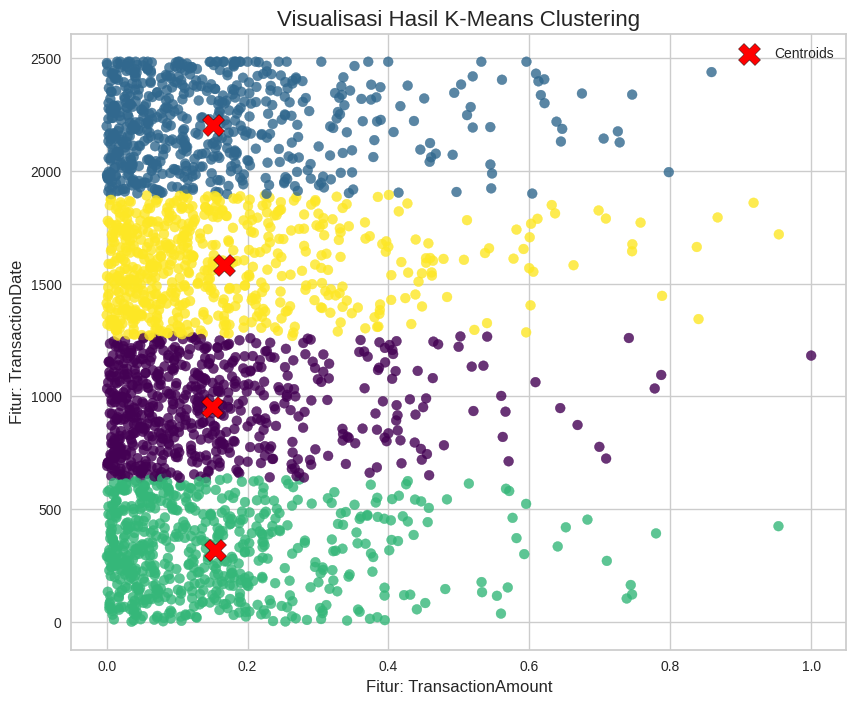

In [24]:
# Membuat visualisasi hasil clustering
plt.figure(figsize=(10, 8))
scatter = plt.scatter(df.iloc[:, 0], df.iloc[:, 1],
                      c=cluster_labels,
                      cmap='viridis',
                      s=50,
                      alpha=0.8)

# Menambahkan titik pusat (centroids) ke dalam plot
plt.scatter(centers[:, 0], centers[:, 1],
            c='red',
            s=250,
            marker='X',
            edgecolors='black',
            label='Centroids')

# Menambahkan judul dan label
plt.title('Visualisasi Hasil K-Means Clustering', fontsize=16)

# Gunakan nama kolom DataFrame Anda jika tersedia untuk label
try:
    plt.xlabel(f'Fitur: {df.columns[0]}', fontsize=12)
    plt.ylabel(f'Fitur: {df.columns[1]}', fontsize=12)
except IndexError:
    plt.xlabel('Fitur 1', fontsize=12)
    plt.ylabel('Fitur 2', fontsize=12)

# Membuat plot
plt.legend()
plt.grid(True)
plt.show()

(Opsional) Membangun Model Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [25]:
# Membangun model menggunakan PCA.
# ___ =PCA(n_components=<x>)
# ___ = ____.fit_transform(___)
# Menyimpan data PCA sebagai Dataframe dengan nama PCA_<numbers>
# <data_final> = pd.DataFrame(___, columns=['PCA1', 'PCA2', <sesuaikan dengan jumlah n>])
# Pastikan kamu membangun model Kmeans baru dengan data yang sudah dimodifikasi melalui PCA.
# ___ = KMeans(n_clusters=<x>)
# ___.fit(<data_final>)

In [26]:
# Simpan model PCA sebagai perbandingan dengan menjalankan cell code ini joblib.dump(model,"PCA_model_clustering.h5")
# Pastikan yang disimpan model yang sudah melalui .fit berdasarkan dataset yang sudah dilakukan PCA
# joblib.dump(___, "PCA_model_clustering.h5")

# **5. Interpretasi Cluster**

## **a. Interpretasi Hasil Clustering**
1. **Contoh Interpretasi:**
- **Cluster 1: (Nasabah Bertransaksi dan Pendapatan Besar)**:
  - **Rata-rata (mean) Annual Income:** 0.953 (48,260)
  - **Rata-rata (mean) Spending Score:** 0.8 (56.48)
  - **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan tinggi dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang tinggi dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka. Sehingga rekomendasi pada kelompok nasabah ini adalah dengan menawarkan produk-produk investasi atau perbankan yang berkualitas tinggi.


In [27]:
# Menampilkan analisis deskriptif minimal mean, min dan max untuk fitur numerik.
# Silakan menambahkan fungsi agregasi lainnya untuk experience lebih baik.
# pastikan output menghasilkan agregasi dan groupby bersamaan dengan mean, min, dan max.

# Tentukan nama kolom cluster dan kolom lain yang akan dikecualikan
cluster_column_name = 'cluster_labels'
columns_to_exclude = ['Target', cluster_column_name]

# Pilih semua kolom numerik secara otomatis
all_numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
numerical_cols_to_agg = [col for col in all_numerical_cols if col not in columns_to_exclude]

#membuat fungsi mode as modus, karena tidak termasuk dalam library
def get_mode(series):
    return series.mode().iloc[0] if not series.mode().empty else np.nan

get_mode.__name__ = 'mode'
agg_functions = ['mean', 'min', 'max', 'median', 'std', get_mode]
pd.set_option('display.max_columns', None)
# Lakukan groupby berdasarkan kolom cluster dan hitung agregasi untuk kolom numerik terpilih
cluster_analysis = df.groupby(cluster_column_name)[numerical_cols_to_agg].agg(agg_functions)
cluster_analysis = cluster_analysis.round(2)

cluster_analysis

TransactionAmount                                \
                            mean  min   max median   std  mode   
cluster_labels                                                   
0                           0.15  0.0  1.00   0.10  0.14  0.04   
1                           0.15  0.0  0.86   0.11  0.15  0.00   
2                           0.15  0.0  0.95   0.11  0.15  0.00   
3                           0.17  0.0  0.95   0.11  0.16  0.00   

               TransactionDate                                    \
                          mean   min   max  median     std  mode   
cluster_labels                                                     
0                       951.17   635  1267   951.5  181.90   635   
1                      2206.24  1896  2485  2209.5  177.63  2485   
2                       318.63     0   638   319.0  183.60     0   
3                      1582.13  1268  1895  1585.0  181.52  1268   

               TransactionType                           Location          \
                          mean min max median   std mode     mean min max   
cluster_labels                                                              
0                         0.79   0   2    1.0  0.44    1    21.43   0  43   
1                         0.77   0   2    1.0  0.44    1    21.29   0  43   
2                         0.81   0   2    1.0  0.43    1    21.42   0  43   
3                         0.78   0   2    1.0  0.45    1    21.40   0  43   

                                  Channel                            \
               median    std mode    mean min max median   std mode   
cluster_labels                                                        
0                22.0  12.43   16    1.02   0   3    1.0  0.82    1   
1                21.0  12.60   13    1.07   0   3    1.0  0.84    2   
2                22.0  12.47    4    0.97   0   3    1.0  0.82    1   
3                21.0  12.20   15    1.00   0   3    1.0  0.84    0   

               CustomerAge                              CustomerOccupation  \
                      mean  min  max median   std  mode               mean   
cluster_labels                                                               
0                     0.44  0.0  1.0   0.46  0.30  0.15               1.57   
1                     0.43  0.0  1.0   0.45  0.28  0.13               1.51   
2                     0.41  0.0  1.0   0.39  0.28  0.06               1.47   
3                     0.44  0.0  1.0   0.47  0.29  0.15               1.58   

                                         TransactionDuration             \
               min max median   std mode                mean  min   max   
cluster_labels                                                            
0                0   4    2.0  1.17    3                0.38  0.0  0.99   
1                0   4    1.0  1.15    1                0.38  0.0  1.00   
2                0   4    1.0  1.15    0                0.37  0.0  1.00   
3                0   4    2.0  1.14    3                0.39  0.0  1.00   

                                  LoginAttempts                              \
               median   std  mode          mean  min  max median   std mode   
cluster_labels                                                                
0                0.36  0.24  0.52          0.03  0.0  1.0    0.0  0.14  0.0   
1                0.34  0.25  0.07          0.03  0.0  1.0    0.0  0.15  0.0   
2                0.34  0.24  0.18          0.04  0.0  1.0    0.0  0.16  0.0   
3                0.37  0.24  0.33          0.02  0.0  1.0    0.0  0.13  0.0   

               AccountBalance                               \
                         mean  min  max median   std  mode   
cluster_labels                                               
0                        0.33  0.0  1.0   0.30  0.27  0.00   
1                        0.34  0.0  1.0   0.32  0.26  0.44   
2                        0.34  0.0  1.0   0.31  0.26  0.00   
3                        0.33  0.0  1.

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya.
1. **Cluster 1: (___)**:
  - **Rata-rata (mean) <Fitur>:** <Sebelum inverse> <Setelah inverse>
  - **Analisis:** Cluster ini ...

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya.
1. **Cluster 0: Nasabah Pasif dengan Saldo Tinggi (Cluster Ungu)**:
- **Rata-rata (mean) TransactionAmount:** 0.15 (Min: 0.0, Max: 1.00)
- **Rata-rata (mean) TransactionDuration:** 0.38 (Min: 0.0, Max: 1.00)
- **Rata-rata (mean) AccountBalance:** 0.33 (Min: 0.0, Max: 1.0)
- **Rata-rata (mean) LoginAttempts:** 0.03 (Min: 0.0, Max: 1.0)
- **Modus TransactionType:** 1 (Debit)
- **Modus Location:** 21
- **Modus Channel:** 1 (ATM)
- **Modus CustomerOccupation:** 2 (Mahasiswa)
- **Modus PreviousTransactionDate:** 173

**Analisis:**
Cluster ini mewakili kelompok nasabah yang memiliki rata-rata `TransactionAmount` dan `TransactionDuration` yang relatif rendah dibandingkan beberapa cluster lain, tetapi sebaran `TransactionAmount` dan `TransactionDuration` cukup luas (min-max menunjukkan ada transaksi kecil hingga besar dan durasi pendek hingga panjang). Mereka memiliki rata-rata `AccountBalance` di tengah rentang yang ada. Rata-rata `LoginAttempts` sangat rendah. Modus `TransactionType` adalah Debit, dan modus `Channel` adalah ATM. Modus `CustomerOccupation` adalah Mahasiswa. Hal ini menunjukkan bahwa meskipun rata-rata aktivitas tidak setinggi cluster lain, ada beragam perilaku dalam cluster ini, dengan kecenderungan transaksi debit melalui ATM dan banyak di antaranya berstatus mahasiswa.

2. **Cluster 1: Nasabah Transaksional Online Aktif (Cluster Hijau)**:
- **Rata-rata (mean) TransactionAmount:** 0.15 (Min: 0.0, Max: 0.86)
- **Rata-rata (mean) TransactionDuration:** 0.38 (Min: 0.0, Max: 1.00)
- **Rata-rata (mean) AccountBalance:** 0.34 (Min: 0.0, Max: 1.0)
- **Rata-rata (mean) LoginAttempts:** 0.03 (Min: 0.0, Max: 1.0)
- **Modus TransactionType:** 1 (Debit)
- **Modus Location:** 21
- **Modus Channel:** 2 (Online)
- **Modus CustomerOccupation:** 2 (Mahasiswa)
- **Modus PreviousTransactionDate:** 180

**Analisis:**
Cluster ini serupa dengan Cluster 0 dalam hal rata-rata `TransactionAmount` dan `TransactionDuration`, namun memiliki modus `Channel` yang berbeda yaitu Online. Rata-rata `AccountBalance` dan `LoginAttempts` juga mirip dengan Cluster 0. Rentang `TransactionAmount` maksimal sedikit lebih rendah dibandingkan Cluster 0. Modus `TransactionType` tetap Debit, dan modus `CustomerOccupation` adalah Mahasiswa. Ini menunjukkan kelompok nasabah yang aktif bertransaksi, terutama secara online, dengan saldo rata-rata menengah dan upaya login rendah.

3. **Cluster 2: Nasabah Kurang Aktif (Cluster Kuning)**:
- **Rata-rata (mean) TransactionAmount:** 0.15 (Min: 0.0, Max: 0.95)
- **Rata-rata (mean) TransactionDuration:** 0.37 (Min: 0.0, Max: 1.00)
- **Rata-rata (mean) AccountBalance:** 0.34 (Min: 0.0, Max: 1.0)
- **Rata-rata (mean) LoginAttempts:** 0.04 (Min: 0.0, Max: 1.0)
- **Modus TransactionType:** 1 (Debit)
- **Modus Location:** 21
- **Modus Channel:** 0 (ATM)
- **Modus CustomerOccupation:** 0 (Dokter)
- **Modus PreviousTransactionDate:** 195

**Analisis:**
Cluster ini memiliki rata-rata `TransactionAmount`, `TransactionDuration`, `AccountBalance`, dan `LoginAttempts` yang mirip dengan Cluster 0 dan 1. Rentang nilai `TransactionAmount` dan `TransactionDuration` juga luas. Perbedaan signifikan muncul pada modus `Channel` yang kembali ke ATM, dan modus `CustomerOccupation` yang merupakan Dokter. Ini menunjukkan kelompok nasabah dengan aktivitas rata-rata serupa, cenderung bertransaksi melalui ATM, dan banyak di antaranya berprofesi sebagai Dokter.

4. **Cluster 3: Nasabah Aktif dengan Saldo Menengah (Cluster Biru)**:
- **Rata-rata (mean) TransactionAmount:** 0.17 (Min: 0.0, Max: 0.95)
- **Rata-rata (mean) TransactionDuration:** 0.39 (Min: 0.0, Max: 1.00)
- **Rata-rata (mean) AccountBalance:** 0.33 (Min: 0.0, Max: 1.0)
- **Rata-rata (mean) LoginAttempts:** 0.02 (Min: 0.0, Max: 1.0)
- **Modus TransactionType:** 1 (Debit)
- **Modus Location:** 21
- **Modus Channel:** 1 (ATM)
- **Modus CustomerOccupation:** 2 (Mahasiswa)
- **Modus PreviousTransactionDate:** 183

**Analisis:**
Cluster ini menunjukkan rata-rata `TransactionAmount` yang sedikit lebih tinggi dibandingkan cluster lain, dengan rentang yang luas. Rata-rata `TransactionDuration`, `AccountBalance`, dan `LoginAttempts` serupa dengan cluster lainnya. Modus `TransactionType` adalah Debit, `Channel` adalah ATM, dan `CustomerOccupation` adalah Mahasiswa. Perilaku transaksi rata-rata di cluster ini paling tinggi dalam hal jumlah, meskipun saluran dan pekerjaan dominan serupa dengan beberapa cluster lainnya. Ini bisa menjadi kelompok yang paling aktif bertransaksi secara umum.

# **6. Mengeksport Data**

1. Simpan nama kolom hasil clustering dengan nama `Target`.
2. Simpan hasilnya ke dalam file CSV menggunakan function `to_csv()`.

In [29]:
# Pastikan nama kolom clustering sudah diubah menjadi Target
df['Target'] = cluster_labels
df.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,cluster_labels,Target
0,0.007207,680,1,36,0,0.838710,0,0.244828,0.0,0.336832,105,0,0
1,0.195940,1178,1,15,0,0.806452,0,0.451724,0.0,0.918055,192,0,0
2,0.065680,1262,1,23,2,0.016129,3,0.158621,0.0,0.068637,41,0,0
3,0.096016,818,1,33,2,0.129032,3,0.051724,0.0,0.569198,163,0,0
5,0.047888,635,1,28,0,0.000000,3,0.558621,0.0,0.045738,13,0,0


In [30]:
# Simpan Data
# ___.to_csv('data_clustering.csv', index=False)
df.to_csv('data_clustering.csv', index=False)
print("Berhasil disimpan ke 'data_clustering.csv'.")

Berhasil disimpan ke 'data_clustering.csv'.


(Opsional) Interpretasi Hasil Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [31]:
# inverse dataset ke rentang normal untuk numerikal
# df[numerical_cols] = <nama_scaler>.inverse_transform(df[numerical_cols])
# tampilkan dataset yang sudah di-inverse
# ___.head()

In [32]:
# inverse dataset yang sudah diencode ke kategori aslinya.
# Lengkapi kode berikut jika ingin menerapkan kriteria ini (silakan hapus simbol pagar pada kode yang akan digunakan.)
# for ___ in categorical_cols:
#     ___ = encoders[col]
#     df[col] = ___.inverse_transform(df_inverse[col].astype(int))
# tampilkan dataset yang sudah di-inverse
# ___.head()

In [33]:
# Lakukan analisis deskriptif minimal mean, min dan max untuk fitur numerik dan mode untuk kategorikal seperti pada basic tetapi menggunakan data yang sudah diinverse.
# pastikan output menghasilkan agregasi dan groupby bersamaan dengan mean, min, dan max kembali setelah melakukan inverse.

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya setelah inverse.
1. **Cluster 1: (___)**:
  - **Rata-rata (mean) <Fitur>:** <Sebelum inverse> <Setelah inverse>
  - **Analisis:** Cluster ini ...

(Opsional) Interpretasi Hasil Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [34]:
# Mengintegrasikan kembali data yang telah di-inverse dengan hasil cluster.

In [35]:
# Simpan Data
# ___.to_csv('data_clustering_inverse.csv', index=False)

End of Code.